In [1]:
import numpy as numpy
import pandas as pd

In [2]:
df = pd.read_csv('./datasets/spam.csv', encoding='latin1')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
df.drop(columns = {'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)
df.sample(5)

,v1,v2
4352,ham,Fun fact: although you would think armand woul...
3785,ham,Wat r u doing?
1521,ham,Are you angry with me. What happen dear
2203,ham,soon you will have the real thing princess! Do...
5056,ham,Hey next sun 1030 there's a basic yoga course....


In [7]:
#renaming
df.rename(columns={'v1':'target','v2':'text'}, inplace =True)
df.sample(5)

,target,text
2811,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
4658,ham,I cant pick the phone right now. Pls send a me...
3686,ham,Great! I shoot big loads so get ready!
4538,ham,"Party's at my place at usf, no charge (but if ..."
4124,ham,May b approve panalam...but it should have mor...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
#Encoding target values into numerical values(0-ham, 1-Spam)
df['target']= encoder.fit_transform(df['target'])

In [10]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#duplicates
df.duplicated().sum()

403

In [13]:
#removing duplicates
df = df.drop_duplicates(keep="first")

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

### EDA

In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

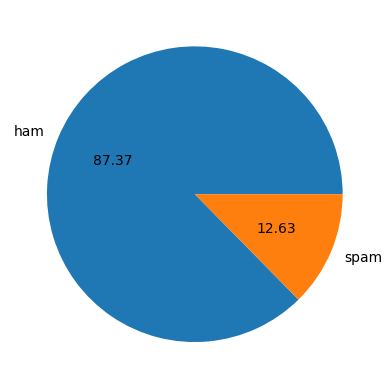

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=["ham","spam"], autopct="%0.2f")
plt.show()

In [18]:
#for imbalances in text
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
#num chars in text
df['num_chars']= df['text'].apply(len)

In [21]:
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#num of words
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
#num of sentences
df["num_sent"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#Spam counts
df[df['target']==1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
#Ham counts
df[df['target']==0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

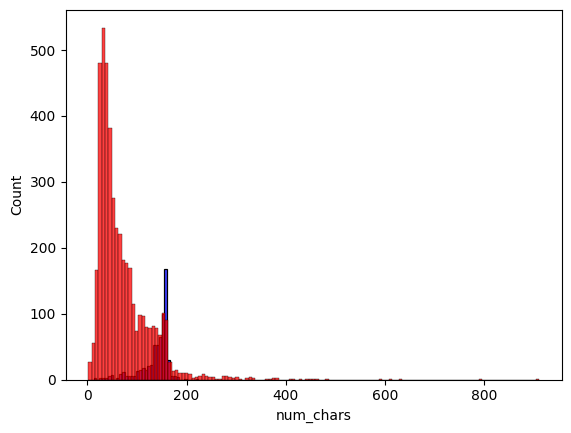

In [30]:
sns.histplot(df[df['target']==1]['num_chars'],color='blue')
sns.histplot(df[df['target']==0]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

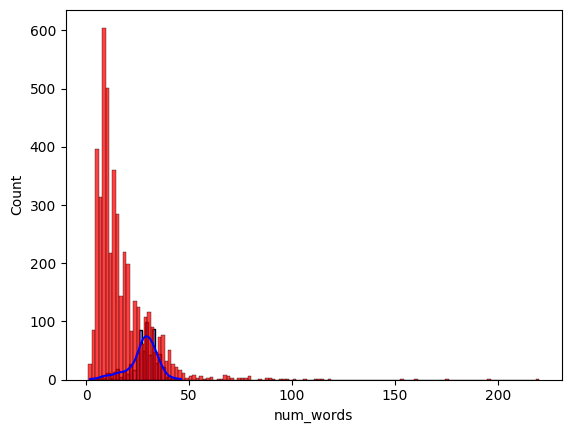

In [31]:
sns.histplot(df[df['target']==1]['num_words'],kde=True,color='blue')
sns.histplot(df[df['target']==0]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

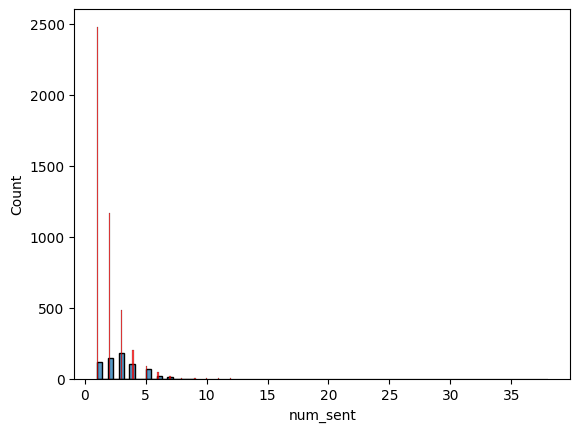

In [32]:
sns.histplot(df[df['target']==1]['num_sent'])
sns.histplot(df[df['target']==0]['num_sent'],color='red')

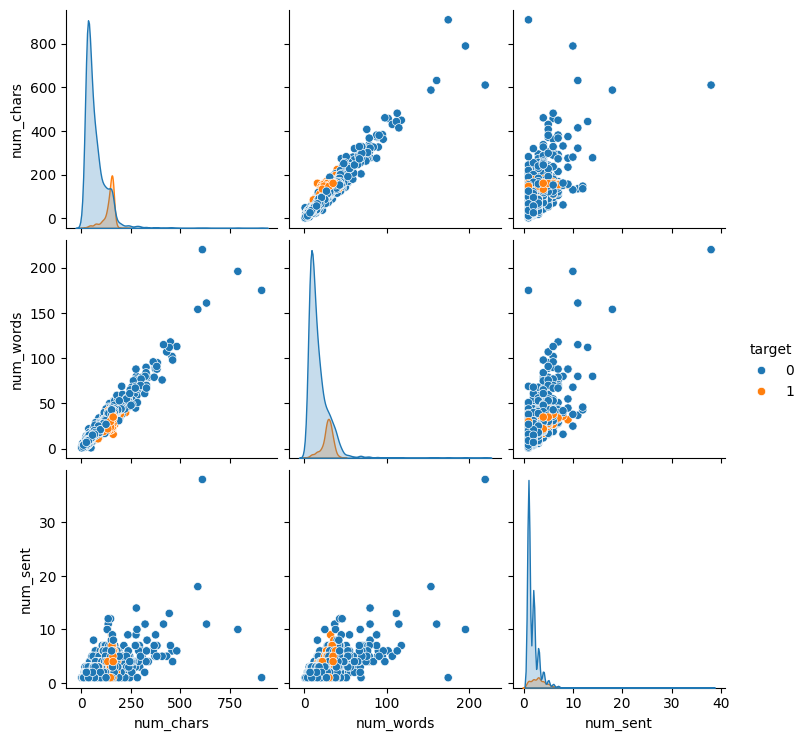

In [33]:
sns.pairplot(df,hue='target')

<Axes: >

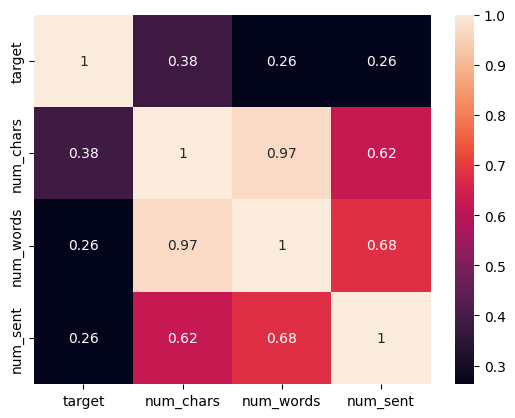

In [36]:
sns.heatmap(df[['target','num_chars','num_words','num_sent']].corr(),annot=True)

### Data Preprocessing

In [91]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
nltk.download('punkt')  # For word_tokenize()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [155]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
tokenizer = TweetTokenizer(preserve_case=False)  # Handles contractions properly
ps = PorterStemmer()
stopwords = [re.sub(r'[^\w\s]', '', word) for word in stopwords.words('english')]

In [149]:
#preprocessing through lowercase, tokenisation, stopwords removal, punctuation removal, stemming

def transform_text(text):
    text =text.lower()
    text = nltk.word_tokenize(re.sub(r'[^\w\s]', '', text))
    text = [ps.stem(i) for i in text if i not in stopwords]
    return " ".join(text)
    

In [151]:
df['transformed_text'] = df['text'].apply(transform_text)

In [152]:
df.head()   


,target,text,num_chars,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
pip install wordcloud

In [183]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500,min_font_size=10,background_color="white")

In [184]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

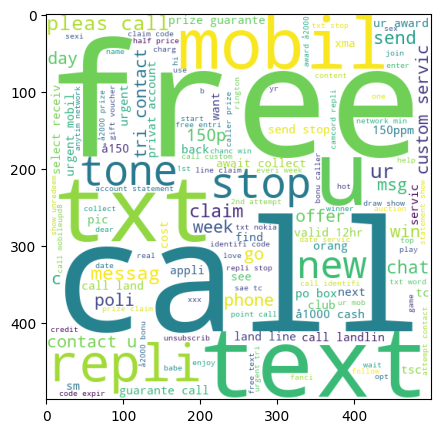

In [185]:
plt.figure(figsize=(12,5))
plt.imshow(spam_wc)

In [186]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

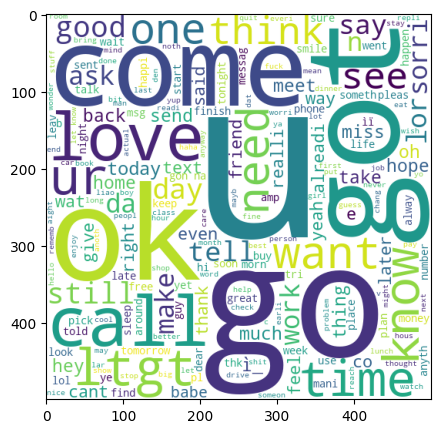

In [187]:
plt.figure(figsize=(12,5))
plt.imshow(ham_wc)

In [158]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [160]:
len(spam_corpus)

10766

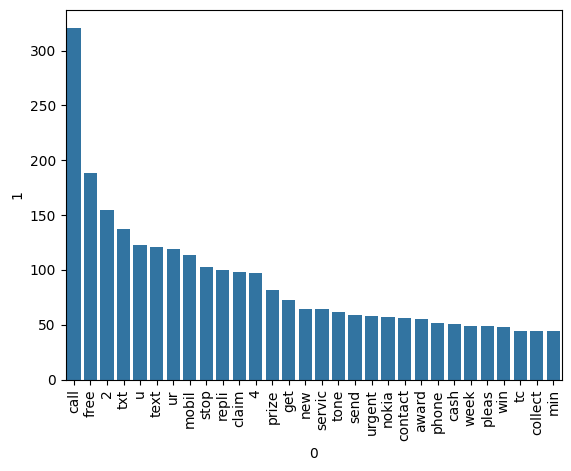

In [189]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

In [191]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [192]:
len(ham_corpus)

35488

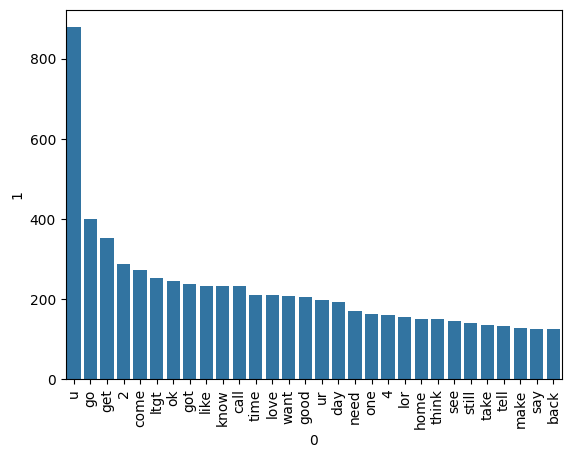

In [193]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=90)
plt.show()

### Model Building

In [195]:
#Text Vectorisation Bag of words

df.sample(5)

,target,text,num_chars,num_words,num_sent,transformed_text
1514,0,K:)all the best:)congrats...,28,10,1,kall bestcongrat
1921,0,No current and food here. I am alone also,41,10,2,current food alon also
1933,0,R u over scratching it?,23,6,1,r u scratch
4765,0,Whens your radio show?,22,5,1,when radio show
4271,0,Where to get those?,19,5,1,get


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [232]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [233]:
X.shape

(5169, 8034)

In [234]:
y= df['target'].values

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [237]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score

In [238]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [239]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

In [240]:
print("Accuracy Score of GaussianNB:",accuracy_score(y_test,y_pred))
print("Confusion Matrix of GaussianNB:\n",confusion_matrix(y_test,y_pred))
print("Precison Score of GaussianNB:",precision_score(y_test,y_pred))
print("Classification Report of GaussianNB:\n", classification_report(y_test, y_pred))

Accuracy Score of GaussianNB: 0.8723404255319149
Confusion Matrix of GaussianNB:
 [[786 110]
 [ 22 116]]
Precison Score of GaussianNB: 0.5132743362831859
Classification Report of GaussianNB:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.84      0.64       138

    accuracy                           0.87      1034
   macro avg       0.74      0.86      0.78      1034
weighted avg       0.91      0.87      0.88      1034



In [241]:
mnb.fit(X_train,y_train)
y_pred = mnb.predict(X_test)

In [242]:
print("Accuracy Score of MultinomialNB:",accuracy_score(y_test,y_pred))
print("Confusion Matrix of MultinomialNB:\n",confusion_matrix(y_test,y_pred))
print("Precison Score of MultinomialNB:",precision_score(y_test,y_pred))
print("Classification Report of MultinomialNB:\n", classification_report(y_test, y_pred))

Accuracy Score of MultinomialNB: 0.9545454545454546
Confusion Matrix of MultinomialNB:
 [[896   0]
 [ 47  91]]
Precison Score of MultinomialNB: 1.0
Classification Report of MultinomialNB:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       896
           1       1.00      0.66      0.79       138

    accuracy                           0.95      1034
   macro avg       0.98      0.83      0.88      1034
weighted avg       0.96      0.95      0.95      1034



In [243]:
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)

In [244]:
print("Accuracy Score of BernoulliNB:",accuracy_score(y_test,y_pred))
print("Confusion Matrix of BernoulliNB:\n",confusion_matrix(y_test,y_pred))
print("Precison Score of BernoulliNB:",precision_score(y_test,y_pred))
print("Classification Report of BernoulliNB:\n", classification_report(y_test, y_pred))

Accuracy Score of BernoulliNB: 0.9709864603481625
Confusion Matrix of BernoulliNB:
 [[894   2]
 [ 28 110]]
Precison Score of BernoulliNB: 0.9821428571428571
Classification Report of BernoulliNB:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.98      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

In [ ]:
pip install xgboost


In [260]:
svc = SVC(kernel='sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(algorithm="SAMME")

gbc = GradientBoostingClassifier(n_estimators=100, random_state=2)
mnb = MultinomialNB()
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=2)


In [253]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'DT': dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost': abc,
    'GradientBoosting': gbc,
    'MultinomialNB': mnb,
    'BaggingClassifier': bc,
    'ExtraTreesClassifier': etc,
    'XGB': xgb,
    'GBDT': gbdt
}

In [258]:

def train_classifier(clf, X_train, y_train):    
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)

    return accuracy, precision

In [261]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    accuracy, precision = train_classifier(clf, X_train, y_train)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    print(f"Classifier: {name}\n Accuracy: {accuracy}\n Precision: {precision}\n")


Classifier: SVC
 Accuracy: 0.9874244256348247
 Precision: 0.9853249475890985

Classifier: KN
 Accuracy: 0.9153567110036276
 Precision: 1.0

Classifier: DT
 Accuracy: 0.9528415961305925
 Precision: 0.9444444444444444

Classifier: LR
 Accuracy: 0.958645707376058
 Precision: 0.955026455026455

Classifier: RF
 Accuracy: 1.0
 Precision: 1.0



C:\Users\deepa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Classifier: AdaBoost
 Accuracy: 0.973639661426844
 Precision: 0.9551569506726457



KeyboardInterrupt: 

In [ ]:
performance = pd.DataFrame({'Classifier': list(clfs.keys()), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Accuracy', ascending=False) 

In [ ]:
performance

In [ ]:
performance1 = pd.melt(performance, id_vars='Classifier', value_vars=['Accuracy', 'Precision'], var_name='Metric', value_name='Values')

In [ ]:
sns.catplot(x='Classifier', y='Accuracy', data=performance, kind='bar', aspect=3)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#model improvements
#max features in tfidf to 3000

In [ ]:
performance.merge(temp_df, on='Classifier')

In [ ]:
from sklearn.ensemble import VotingClassifier